In [792]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [793]:
import PIL
import os
from PIL import Image

f = r'E://box3/G/resized/128/train/G3'

os.listdir(f)

for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((80,64))
    img.save(f_img)

In [794]:
img_width, img_height = 64, 64

train_data_dir = 'G/resized/128/train'
#validation_data_dir = '../input/main-dataset/main_dataset/validation'
test_data_dir = 'G/resized/128/test'
nb_train_samples = 140
nb_validation_samples = 60
epochs = 180
batch_size = 20
#regularizer = tf.keras.regularizers.l2(0.01,)

#if K.image_data_format() == 'channels_first':
#  input_shape = (3, img_width, img_height)
#else:
input_shape = (img_width, img_height, 3)

In [795]:
train_datagen = ImageDataGenerator(
    #rescale = 1./255,
    #shear_range = 0.3,
    #zoom_range = 0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip = True
)

test_datagen = ImageDataGenerator(#rescale = 1./255
)

In [796]:
train_batches = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    #classes=['EOISINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
    class_mode = 'categorical')

Found 155 images belonging to 3 classes.


In [797]:
test_batches = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_width, img_height),
    batch_size = 60,
    #color_mode = 'grayscale',
    class_mode = 'categorical')

Found 60 images belonging to 3 classes.


In [798]:
def plots(ims, figsize=(12,6), rows=None, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [799]:
imgs, labels = next(train_batches)

In [800]:
#model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [801]:
#Eoisinophil=8[1.0.0.0],Lymphocyte=4[0.1.0.0],monocyte=2[0.0.1.0],neutrophil=1[0.0.0.1]-->Labels
#plots(imgs, rows=4, titles=labels)

In [802]:
#model = Sequential()

#model.add(Conv2D(32, kernel_size=(11,11), strides= 4,
#                        padding= 'valid', activation= 'relu',
#                        input_shape= input_shape,
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Conv2D(256, kernel_size=(5,5), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None)) 

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(256, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Flatten())
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(1000, activation= 'relu'))
#model.add(Dense(4, activation= 'softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [803]:
#model = Sequential()

#model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())

#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(3, activation='softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [804]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())         
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_216 (Conv2D)         (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization_216 (Ba  (None, 62, 62, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_217 (Conv2D)         (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization_217 (Ba  (None, 60, 60, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_218 (Conv2D)         (None, 58, 58, 64)        36928     
                                                                 
 batch_normalization_218 (Ba  (None, 58, 58, 64)     

In [805]:
%%time
h = model.fit_generator(
    train_batches,
    steps_per_epoch = 6,
    epochs = epochs,
    validation_data = test_batches,
    validation_steps = nb_validation_samples // batch_size,
    #callbacks=[
    #    tf.keras.callbacks.ModelCheckpoint(filepath = '/kaggle/working/model_{val_accuracy:.3f}.h5', save_best_only=True,
    #                                      save_weights_only=False, monitor='val_accuracy')
    #]
)

Epoch 1/180


c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


6/6 [==============================] - 16s 2s/step - loss: 6.6479 - accuracy: 0.4000 - val_loss: 90.4718 - val_accuracy: 0.3333
Epoch 2/180
6/6 [==============================] - 10s 2s/step - loss: 8.6438 - accuracy: 0.4957
Epoch 3/180
6/6 [==============================] - 9s 2s/step - loss: 8.6863 - accuracy: 0.4348
Epoch 4/180
6/6 [==============================] - 10s 2s/step - loss: 5.7550 - accuracy: 0.4833
Epoch 5/180
6/6 [==============================] - 11s 2s/step - loss: 4.2737 - accuracy: 0.5391
Epoch 6/180
6/6 [==============================] - 10s 2s/step - loss: 7.1584 - accuracy: 0.4261
Epoch 7/180
6/6 [==============================] - 9s 2s/step - loss: 6.4726 - accuracy: 0.4667
Epoch 8/180
6/6 [==============================] - 9s 1s/step - loss: 5.3886 - accuracy: 0.4783
Epoch 9/180
6/6 [==============================] - 8s 1s/step - loss: 6.1130 - accuracy: 0.5333
Epoch 10/180
6/6 [==============================] - 10s 2s/step - loss: 3.0163 - accuracy: 0.6261
Ep

6/6 [==============================] - 9s 2s/step - loss: 0.2141 - accuracy: 0.9130
Epoch 82/180
6/6 [==============================] - 9s 2s/step - loss: 0.4001 - accuracy: 0.9000
Epoch 83/180
6/6 [==============================] - 9s 2s/step - loss: 0.2081 - accuracy: 0.9043
Epoch 84/180
6/6 [==============================] - 9s 1s/step - loss: 0.3165 - accuracy: 0.8783
Epoch 85/180
6/6 [==============================] - 9s 1s/step - loss: 0.3442 - accuracy: 0.9130
Epoch 86/180
6/6 [==============================] - 9s 1s/step - loss: 0.3385 - accuracy: 0.9217
Epoch 87/180
6/6 [==============================] - 9s 1s/step - loss: 0.2093 - accuracy: 0.9304
Epoch 88/180
6/6 [==============================] - 9s 1s/step - loss: 0.1351 - accuracy: 0.9565
Epoch 89/180
6/6 [==============================] - 9s 1s/step - loss: 0.2433 - accuracy: 0.9217
Epoch 90/180
6/6 [==============================] - 9s 1s/step - loss: 0.1595 - accuracy: 0.9304
Epoch 91/180
6/6 [=========================

6/6 [==============================] - 7s 1s/step - loss: 0.4219 - accuracy: 0.9130
Epoch 165/180
6/6 [==============================] - 7s 1s/step - loss: 0.8528 - accuracy: 0.9130
Epoch 166/180
6/6 [==============================] - 7s 1s/step - loss: 0.4231 - accuracy: 0.9304
Epoch 167/180
6/6 [==============================] - 7s 1s/step - loss: 0.2598 - accuracy: 0.9304
Epoch 168/180
6/6 [==============================] - 7s 1s/step - loss: 0.3474 - accuracy: 0.9565
Epoch 169/180
6/6 [==============================] - 7s 1s/step - loss: 0.7840 - accuracy: 0.8783
Epoch 170/180
6/6 [==============================] - 7s 1s/step - loss: 1.0662 - accuracy: 0.8696
Epoch 171/180
6/6 [==============================] - 7s 1s/step - loss: 0.2995 - accuracy: 0.9565
Epoch 172/180
6/6 [==============================] - 7s 1s/step - loss: 0.7469 - accuracy: 0.8870
Epoch 173/180
6/6 [==============================] - 7s 1s/step - loss: 0.5940 - accuracy: 0.8957
Epoch 174/180
6/6 [===============

In [806]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [807]:
rounded_labels = np.argmax(test_labels, axis=-1)

In [808]:
model.save('model_0.92015612.h5')
test_model = load_model('model_0.92015612.h5')

In [809]:
predictions = test_model.predict_generator(test_batches, steps=1, verbose=0)

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [810]:
predictions

array([[1.00000000e+00, 2.81768703e-28, 3.00669653e-29],
       [5.87723311e-03, 7.91545391e-01, 2.02577382e-01],
       [8.47438909e-03, 4.80321914e-01, 5.11203706e-01],
       [1.73642789e-08, 6.80402268e-09, 1.00000000e+00],
       [4.74040171e-05, 2.18587322e-03, 9.97766733e-01],
       [9.27648045e-07, 8.03671981e-07, 9.99998212e-01],
       [4.94847707e-02, 5.36761619e-02, 8.96839142e-01],
       [5.19221255e-12, 5.07841942e-05, 9.99949217e-01],
       [6.16836178e-06, 1.38559422e-04, 9.99855280e-01],
       [4.27150837e-07, 4.56713387e-08, 9.99999523e-01],
       [7.49651909e-01, 7.47715472e-04, 2.49600351e-01],
       [3.10819445e-07, 9.99880672e-01, 1.18960343e-04],
       [2.00959444e-01, 7.84479856e-01, 1.45606296e-02],
       [3.50713643e-04, 7.53377535e-05, 9.99573886e-01],
       [5.88122895e-03, 3.33970070e-01, 6.60148680e-01],
       [2.69150274e-04, 5.53517835e-03, 9.94195640e-01],
       [2.24295836e-02, 9.70166087e-01, 7.40434695e-03],
       [2.34178826e-03, 9.00040

In [811]:
rounded_prediction = np.argmax(predictions, axis=-1)

In [812]:
for i in rounded_prediction:
    print(i)

0
1
2
2
2
2
2
2
2
2
0
1
1
2
2
2
1
1
1
2
2
1
2
2
2
2
1
0
0
2
2
2
1
1
0
0
2
2
2
1
2
0
0
2
0
2
1
2
2
2
2
1
0
0
2
2
1
2
0
1


In [813]:
cm = confusion_matrix(y_true=rounded_labels, y_pred=rounded_prediction)

In [814]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  4  6]
 [ 1  7 12]
 [ 1  4 15]]


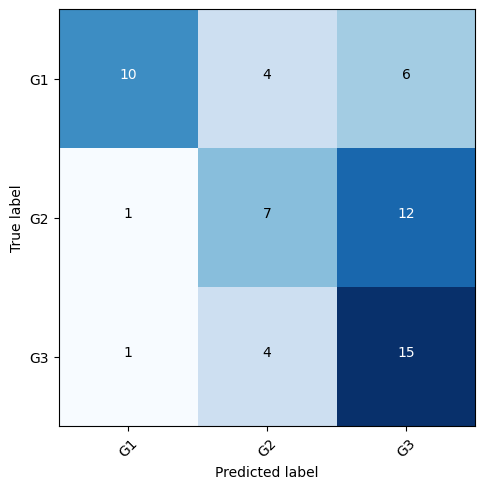

In [815]:
cm_plot_labels = ['G1','G2', 'G3']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


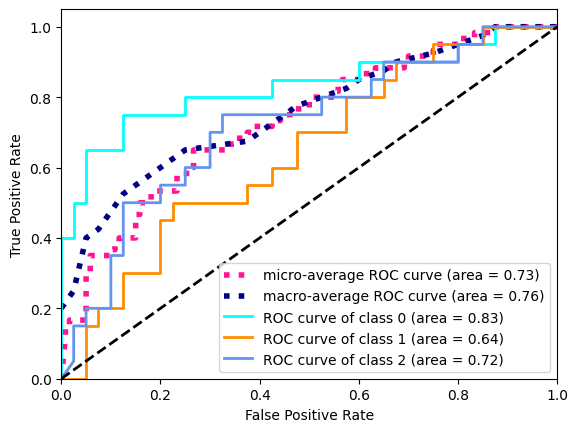

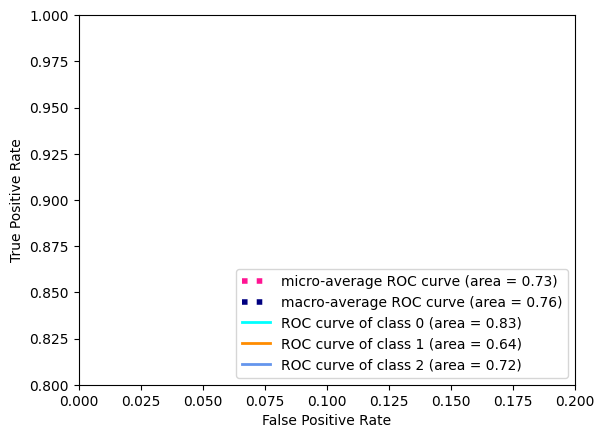

In [816]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [817]:
from sklearn.metrics import classification_report

In [818]:
print(classification_report(y_true=rounded_labels, y_pred=rounded_prediction))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.47      0.35      0.40        20
           2       0.45      0.75      0.57        20

    accuracy                           0.53        60
   macro avg       0.58      0.53      0.53        60
weighted avg       0.58      0.53      0.53        60



In [819]:
score = metrics.log_loss(test_labels,predictions)
print("Log loss score: {}".format(score))

Log loss score: 2.7814035158270958


ValueError: x and y must have same first dimension, but have shapes (180,) and (1,)

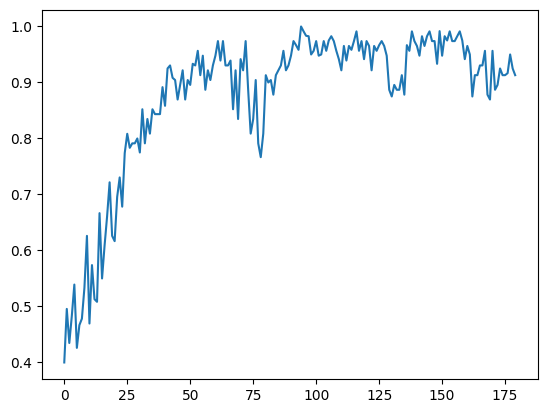

In [820]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
accs = h.history['loss']
val_accs = h.history['val_loss']

plt.plot(range(len(accs)),accs, label = 'Training_loss')
plt.plot(range(len(accs)),val_accs, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()